# Solución de problemas de valor inicial para EDOs


Para deducir el método de Euler comenzamos suponiendo que el problema de valor inicial

$$ y' = f(x, y) \\ y(a) = y_{0} $$

tiene una única solución en un intervalo $[a, b]$, la cual denotamos por $y$. Deseamos aproximar $y$ en un conjunto finito de puntos en $[a, b]$ y estipulamos que estos puntos estarán uniformemente espaciados, por lo que seleccionamos un entero positivo $n$ y definimos el *tamaño de paso* como $h = \frac{b- a}{n}$. Así, tomamos

$$ x_{i} = a + ih $$

para $i = 0, 1, 2, \ldots , n$. Entonces tenemos que $x_{i+1} - x_{i} = h$ y denominamos a cada uno de estos $n+1$ puntos como *puntos de malla*. Buscamos generar $n + 1$ aproximaciones $y_{i}$ a los valores $y(x_{i})$. Si añadimos la suposición que $y \in C^{2} [a, b]$, podemos aplicar el teorema de Taylor a $y$ tomando como centro un punto de malla $x_{i}$ arbitrario. Entonces para todo $x \in [a, b]$ tenemos que

$$ y(x) = y(x_{i}) + y'(x_{i})(x - x_{i}) + \frac{y''( \xi _{i} )}{2} (x - x_{i})^{2} $$

donde $ \xi _{i} $ se encuentra entre $x$ y $x_{i}$. Ahora evaluemos en el punto de malla $x_{i+1}$ 

$$ y(x_{i+1}) = y(x_{i}) + y'(x_{i})(x_{i+1} - x_{i}) + \frac{y''( \xi _{i} )}{2} (x_{i+1} - x_{i})^{2} $$

de lo que podemos deducir que 

$$ y(x_{i+1}) = y(x_{i}) + f(x_{i}, y(x_{i}))h +  O ( h^{2} ) $$

Si descartamos el término $ O ( h^{2} ) $ podemos generar $n+1$ aproximaciones $y_{i+1}  \approx y_{i} + f(x_{i}, y_{i})h $ comenzando con la condición inicial $y_{0}$.

### Dependencias y declaraciones comunes

In [70]:
from sympy import *
from ipywidgets import widgets

from IPython.display import display, display_html, HTML, Latex
import numpy as np

#Definimos las variables a utilizar
x, y = symbols('x y')
f = Function('f')(x, y)
sol = Function('sol')(x)

# Método para imprimir la información en forma de tabla
def printTable(columns, data):
    base_table = ( '<table class="table-bordered table-responsive"><thead><tr>{}'
             '</tr></thead><tbody><tr>{}</tr>'
             '</tbody></table>'
    ).format(
        '<th style="width:40px; text-align:center">{}</th>'.format(
            '</th><th style="text-align:center">'.join(j for j in columns)),
        '</tr><tr>'.join(
            '<td style="text-align:center;">{}</td>'.format('</td><td>'.join(j for j in row)) for row in data
        )
    )
    display(HTML(base_table))

### Parámetros

In [73]:
# Solicitando la función a evaluar
while True:
    try:
        f = sympify(input("Ingrese la expresión f en términos de x, y:  "))
        sol = sympify(input("Ingrese la solución analítica: "))
        break
    except SympifyError:
        print("¡Ups! Parece que la función no fue ingresada correctamente. Intente de nuevo.")
display(Latex("$$ y' = " + latex(f) + " $$"))

Ingrese la expresión f en términos de x, y:  y - x**2 +1
Ingrese la solución analítica: (x + 1)**2 -0.5*exp(x)


<IPython.core.display.Latex object>

In [74]:
# Solicitando los demás valores
while True:
    try:
        a = float(input("Ingrese el límite inferior del intervalo (a): "))
        b = float(input("Ingrese el límite superior del intervalo (b): "))
        y0 = float(input("Ingrese la condición inicial (y0): "))
        h = float(input("Ingrese el tamaño del paso(h): "))
        break
    except ValueError:
        print("El valor ingresado no es un número. Intente de nuevo.")

Ingrese el límite inferior del intervalo (a): 0
Ingrese el límite superior del intervalo (b): 2
Ingrese la condición inicial (y0): 0.5
Ingrese el tamaño del paso(h): 0.1


### Método de Euler

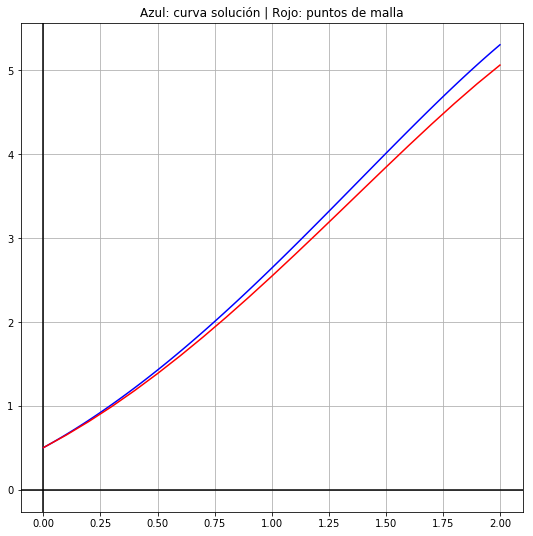

In [77]:
import matplotlib.pyplot as plt;
fig, ax = plt.subplots(figsize=(9, 9));

#Definimos las columnas que contendrá la tabla    
columns = ["i", "xi", "yi", "y(xi)", "Eabs"]
data = []

xvalues = []
yvalues = []

i=0
n = int((b-a)/h) #determinamos los puntos de malla -1
t = a
w = y0
xvalues.append(t)
yvalues.append(w)
val = sol.subs(x, t).evalf()
e_abs = abs(w - val)

aux = [str(i), str(t), str(w), str(val), str(e_abs)]
data.append(aux)

for i in range(1, n+1):
    w = w + h*f.subs({x:t, y:w})
    t = a + i*h
    val = sol.subs(x, t).evalf()
    e_abs = abs(w - val)
    aux = [str(i), str(t), str(w), str(val), str(e_abs)]
    data.append(aux)
    xvalues.append(t)
    yvalues.append(w)
       
lambdaf = lambdify(x, sol);
ax.axhline(y=0, color="k")
ax.axvline(x=0, color="k")
xv = np.linspace(a , b  , 100)
ax.plot(xv, lambdaf(xv), color='blue')
plt.plot(xvalues, yvalues, color='red');
plt.title("Azul: curva solución | Rojo: puntos de malla");
plt.grid();
plt.show()

In [78]:
printTable(columns, data) 

i,xi,yi,y(xi),Eabs
0,0.0,0.5,0.500000000000000,0
1,0.1,0.650000000000000,0.657414540962176,0.00741454096217631
2,0.2,0.814000000000000,0.829298620919915,0.0152986209199150
3,0.30000000000000004,0.991400000000000,1.01507059621200,0.0236705962119985
4,0.4,1.18154000000000,1.21408765117936,0.0325476511793645
5,0.5,1.38369400000000,1.42563936464994,0.0419453646499359
6,0.6000000000000001,1.59706340000000,1.64894059980475,0.0518771998047458
7,0.7000000000000001,1.82076974000000,1.88312364626476,0.0623539062647620
8,0.8,2.05384671400000,2.12722953575377,0.0733828217537664
9,0.9,2.29523138540000,2.38019844442152,0.0849670590215248
